In [2]:
import numpy as np   # for array stuff
import matplotlib.pyplot as plt   # for plotting stuff
import pandas as pd  
import scikitplot as skplt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [8]:
import seaborn as sns

In [3]:
df=pd.read_csv("spectra_PCA_prediction.csv")

In [5]:
df.columns

Index(['Unnamed: 0', 'Temp', 'Mgas', 'ngas', 'T_CH3OH', 'N_CH3OH', 'T_CH3CCH',
       'N_CH3CCH', 'T_CH3CN', 'N_CH3CN', 'Groups', 'Sources', 'coeff_pc0',
       'coeff_pc1', 'coeff_pc2', 'coeff_pc3', 'coeff_pc4', 'coeff_pc5',
       'coeff_pc6', 'coeff_pc7'],
      dtype='object')

In [6]:
data=df[['Groups', 'Sources', 'coeff_pc0',
       'coeff_pc1', 'coeff_pc2', 'coeff_pc3', 'coeff_pc4', 'coeff_pc5',
       'coeff_pc6', 'coeff_pc7']]

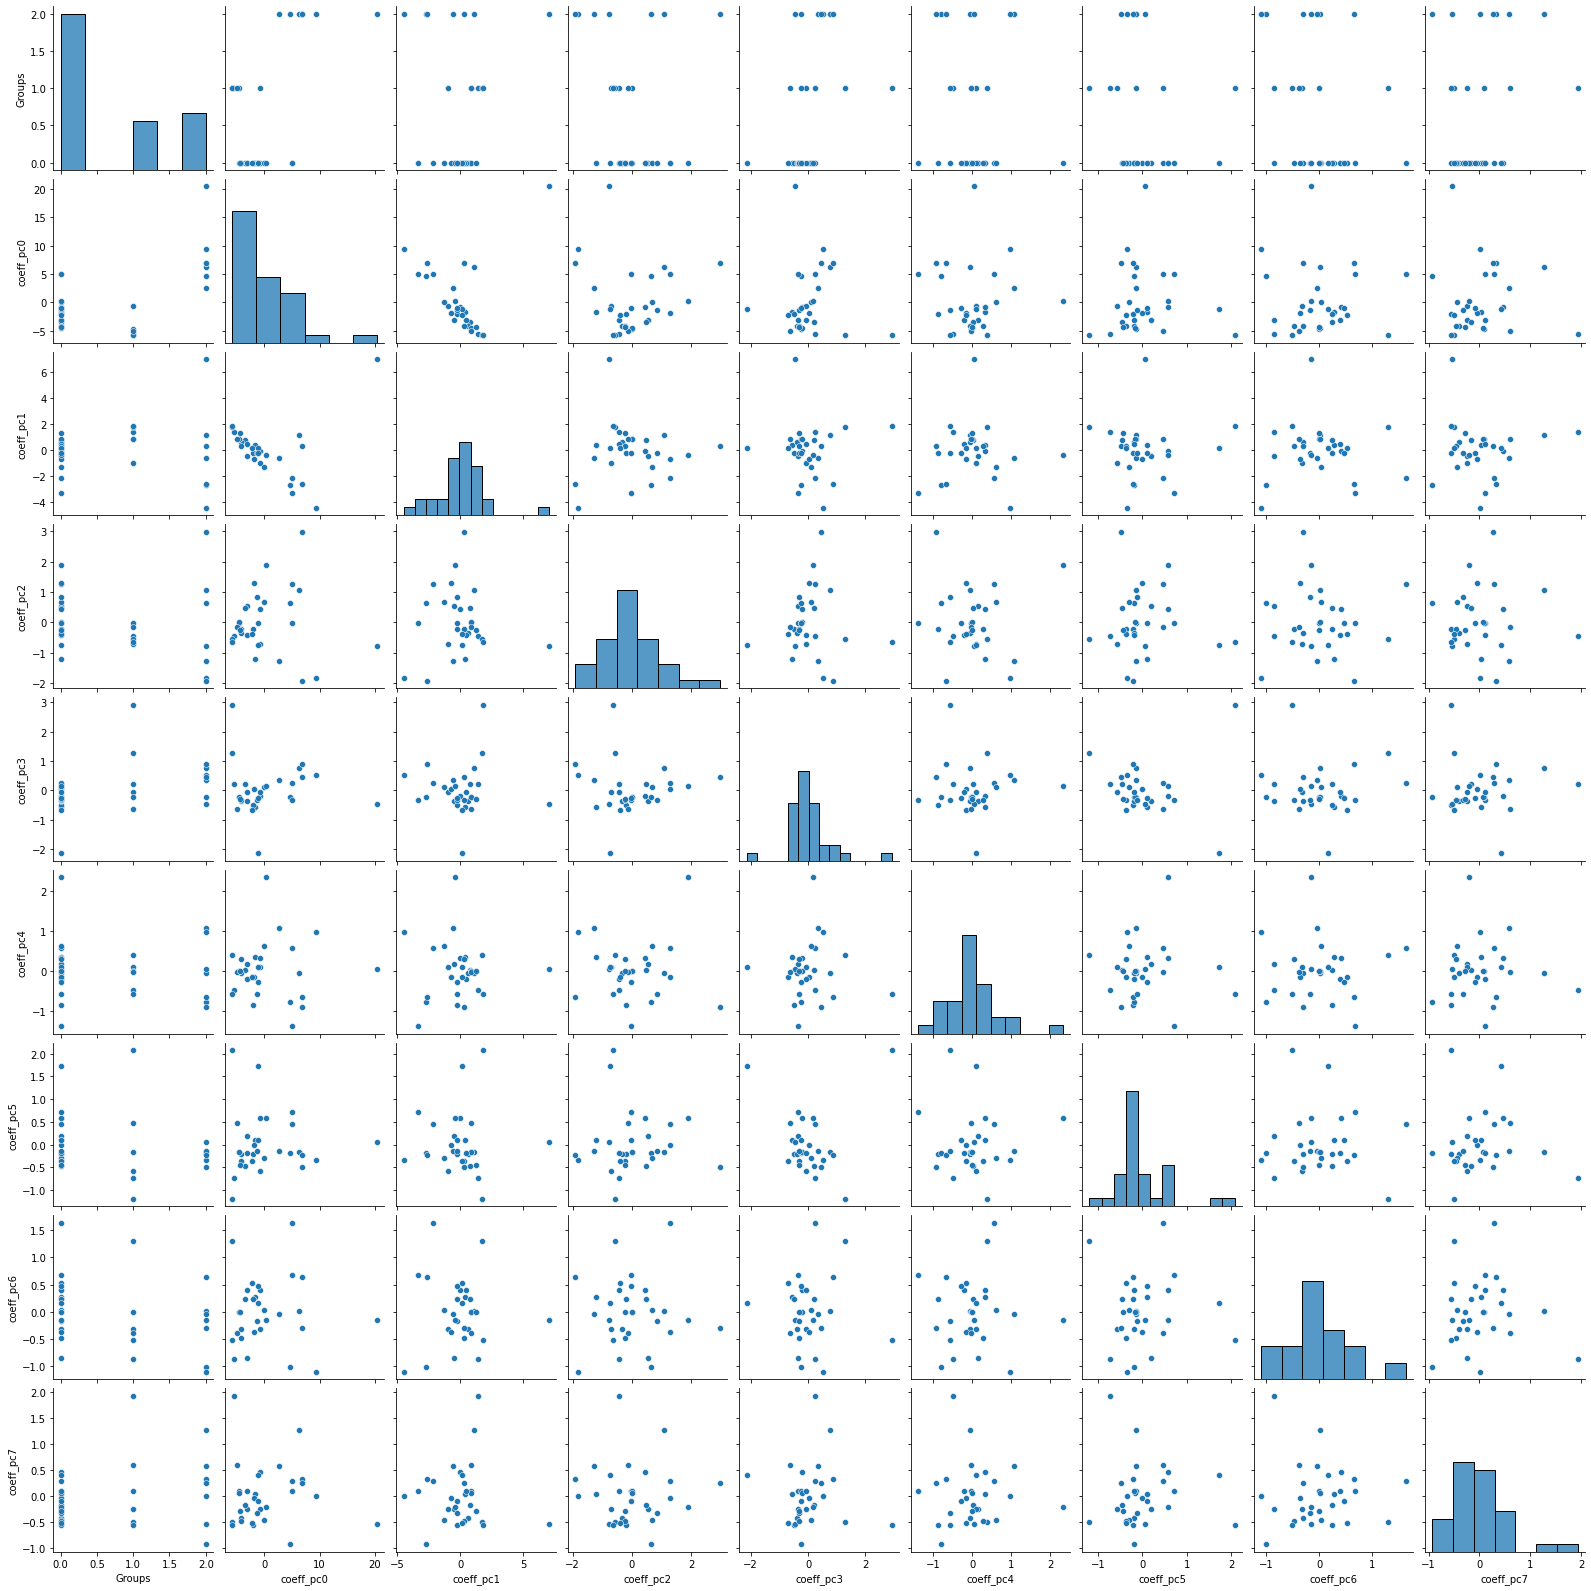

In [10]:
sns.pairplot(data)

In [11]:
features=df[['coeff_pc0',
       'coeff_pc1', 'coeff_pc2', 'coeff_pc3', 'coeff_pc4', 'coeff_pc5',
       'coeff_pc6', 'coeff_pc7']]

In [12]:
feature_names=features.columns

In [13]:
targets=df['Groups']

In [14]:
X_train, X_test, y_train, y_test=train_test_split(features, targets, test_size=0.33, random_state=0)

In [29]:
RFC = RandomForestClassifier(n_jobs=20,n_estimators=100, criterion="gini",random_state=10)
RFC.fit(X_train,y_train)
rfc_predict = RFC.predict(X_test)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict, target_names=[str(i) for i in np.arange(0,len(np.unique(df['Groups'])))] ))#=['Non Pulsar','Pulsar']))
print('\n')
print("=== All AUC Scores ===")
predictions = cross_val_predict(RFC, features, targets, cv=10)
#print(rfc_cv_score)
#print('\n')
#print("=== Mean AUC Score ===")
#print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())
#rfc_cv_score = cross_val_score(RFC, features, targets, cv=10, scoring='roc_auc')

=== Confusion Matrix ===
[[6 0 0]
 [0 1 0]
 [2 0 2]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         4

    accuracy                           0.82        11
   macro avg       0.92      0.83      0.84        11
weighted avg       0.86      0.82      0.80        11



=== All AUC Scores ===


/Users/germanchaparro/miniconda2/envs/pmenv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


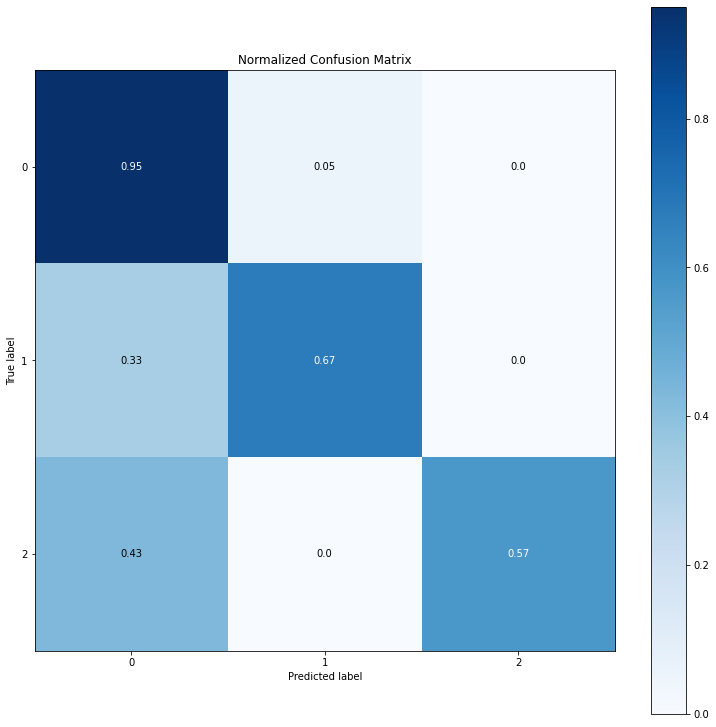

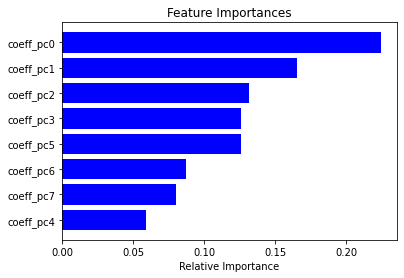

In [30]:
skplt.metrics.plot_confusion_matrix(targets, predictions, normalize=True, figsize=(13,13))
probas = RFC.predict_proba(X_test)
#skplt.metrics.plot_roc(y_test, probas, figsize=(12,12))
#skplt.metrics.plot_precision_recall(y_test, probas, figsize=(12,12))
plt.show()
importances = RFC.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), np.array(feature_names)[indices])
plt.xlabel('Relative Importance')
plt.show()
# por lo menos tan bueno como el basado en T_i,N_i -> sin el procesamiento!!!

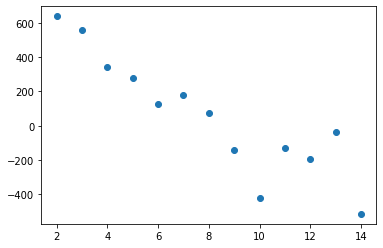

In [41]:
from sklearn.mixture import GaussianMixture as GMM
ran=range(2,15)
bic=[]
for i in ran:
    gmm=GMM(i)
    gmm.fit(features)
    bic+=[gmm.aic(features)]
plt.scatter(ran,bic)
# not very clusterable

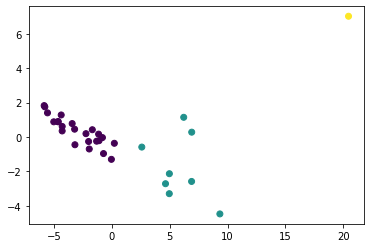

In [44]:
gmm=GMM(3)
gmm.fit(features)
pred=gmm.predict(features)
plt.scatter(features['coeff_pc0'], features['coeff_pc1'],c=pred)